
## Importing Libaries

In [1]:
import pandas as pd #used for data manipulation
import numpy as np #used for numerical analysis
from collections import Counter as c # return counts of number of classess
import matplotlib.pyplot as plt #used for data Visualization
import seaborn as sns #data visualization library
import missingno as msno#finding missing values
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report#model performance
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.preprocessing import LabelEncoder #encoding the levels of categorical features
from sklearn.linear_model import LogisticRegression #Classification ML algorithm
import pickle #Python object hierarchy is converted into a byte stream

## Loading the dataset

In [2]:
data=pd.read_csv(r"C:\Users\anjana kp\Downloads\archive (1)\kidney_disease.csv") #loading the csv data

## Data Pre-Processing

In [3]:
data.head() #return you the first 5 rows values

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...   pcv    wc   rc  htn   dm  cad  appet   pe  ane class  
0  ...  44.0  7800  5.2  yes  yes   no   good   no   no   ckd  
1  ...  38.0  6000  NaN   no   no   no   good   no   no   ckd  
2  ...  31.0  7500  NaN   no  yes   no   poor   no  yes   ckd  
3  ...  32.0  6700  3.9  yes   no   no   poor  yes  yes   ckd  
4  ...  35.0  7300  4.6   no   no   no   good   no   no   ckd  

[5 rows x 26 columns]

In [4]:
data.tail() #return you the last 5 rows values

id   age    bp     sg   al   su     rbc      pc         pcc          ba  \
395  395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

     ...   pcv    wc   rc  htn  dm  cad  appet  pe  ane   class  
395  ...  47.0  6700  4.9   no  no   no   good  no   no  notckd  
396  ...  54.0  7800  6.2   no  no   no   good  no   no  notckd  
397  ...  49.0  6600  5.4   no  no   no   good  no   no  notckd  
398  ...  51.0  7200  5.9   no  no   no   good  no   no  notckd  
399  ...  53.0  6800  6.1   no  no   no   good  no   no  notckd  

[5 rows x 26 columns]

In [5]:
data.head(10) # return the exact top 10 rows values

id   age     bp     sg   al   su       rbc        pc         pcc  \
0   0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1   1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2   2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3   3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4   4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5   5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6   6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7   7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8   8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9   9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   

           ba  ...   pcv     wc   rc  htn   dm  cad  appet   pe  ane class  
0  notpresent  ...  44.0   7800  5.2  yes  yes   no   good   no   no   ckd  
1  notpresent  ...  38.0   6000  NaN   no   no   no   good   no   no   ckd  
2  notpresent  ...  31.0   7500  NaN   no  yes   no   poor   no  yes   ckd  
3  notpresent  ...  32.0   6700  3.9  yes   no   no   poor  yes  yes   ckd  
4  notpresent  ...  35.0   7300  4.6   no   no   no   good   no   no   ckd  
5  notpresent  ...  39.0   7800  4.4  yes  yes   no   good  yes   no   ckd  
6  notpresent  ...  36.0    NaN  NaN   no   no   no   good   no   no   ckd  
7  notpresent  ...  44.0   6900  5.0   no  yes   no   good  yes   no   ckd  
8  notpresent  ...  33.0   9600  4.0  yes  yes   no   good   no  yes   ckd  
9  notpresent  ...  29.0  12100  3.7  yes  yes   no   poor   no  yes   ckd  

[10 rows x 26 columns]

## Dropping id column

In [6]:
data.drop(["id"],axis=1,inplace=True) # drop is used for dropping the column

## Renaming the  Column Names

In [7]:
data.columns #return all the column names

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [8]:
data.columns=['age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class'] # manually giving the name  of the columns
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

## Understanding the data type and its summary

In [9]:
data.info() #info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [10]:
data.describe() # computes summary values for continous column data

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood glucose random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  hemoglobin  packed_cell_volume  red_blood_cell_count  
count  312.000000  348.000000          329.000000            269.000000  
mean     4.627244   12.526437           38.884498              4.707435  
std      3.193904    2.912587            8.990105              1.025323  
min      2.500000    3.100000            9.000000              2.100000  
25%      3.800000   10.300000           32.000000              3.900000  
50%      4.400000   12.650000           40.000000              4.800000  
75%      4.900000   15.000000           45.000000              5.400000  
max     47.000000   17.800000           54.000000              8.000000

## Observing Target, Categoricl and Numerical Columns 

## Target Column

In [11]:
data['class'].unique() # find the unique elements of an array

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

## Rectifying the Target Column

In [12]:
data['class']=data['class'].replace("ckd\t","ckd") #replace is used for renaming  
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [13]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('float64'), dtype('O')], dtype=object),
 array([13, 12], dtype=int64))

## Categorical Columns



In [14]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values) # only fetch the object type columns
print(catcols)

{'bacteria', 'diabetesmellitus', 'white_blood_cell_count', 'pedal_edema', 'pus_cell_clumps', 'appetite', 'red_blood_cells', 'coronary_artery_disease', 'hypertension', 'class', 'anemia', 'pus_cell'}


In [15]:
for i in catcols:
    print("Columns :",i)
    print(c(data[i])) #using counter for checking the number of classess in the column
    print('*'*120+'\n')

Columns : bacteria
Counter({'notpresent': 374, 'present': 22, nan: 4})
************************************************************************************************************************

Columns : diabetesmellitus
Counter({'no': 258, 'yes': 134, '\tno': 3, '\tyes': 2, nan: 2, ' yes': 1})
************************************************************************************************************************

Columns : white_blood_cell_count
Counter({nan: 105, '9800': 11, '6700': 10, '9600': 9, '9200': 9, '7200': 9, '6900': 8, '11000': 8, '5800': 8, '7800': 7, '9100': 7, '9400': 7, '7000': 7, '4300': 6, '6300': 6, '10700': 6, '10500': 6, '7500': 5, '8300': 5, '7900': 5, '8600': 5, '5600': 5, '10200': 5, '5000': 5, '8100': 5, '9500': 5, '6000': 4, '6200': 4, '10300': 4, '7700': 4, '5500': 4, '10400': 4, '6800': 4, '6500': 4, '4700': 4, '7300': 3, '4500': 3, '8400': 3, '6400': 3, '4200': 3, '7400': 3, '8000': 3, '5400': 3, '3800': 2, '11400': 2, '5300': 2, '8500': 2, '14600': 2, '710

## Removing the Columns which are not Categorical

In [16]:
catcols.remove('red_blood_cell_count') # remove is used for removing a particular column
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

KeyError: 'red_blood_cell_count'

## Numerical Columns

In [17]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)# only fetech the float and int type columns
#contcols=pd.DataFrame(data,columns=contcols)
print(contcols)

{'specific_gravity', 'serum_creatinine', 'hemoglobin', 'packed_cell_volume', 'albumin', 'red_blood_cell_count', 'age', 'sodium', 'blood_urea', 'blood glucose random', 'sugar', 'potassium', 'blood_pressure'}


In [18]:
for i in contcols:
    print("Continous Columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns : specific_gravity
Counter({1.02: 106, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
************************************************************************************************************************

Continous Columns : serum_creatinine
Counter({1.2: 40, 1.1: 24, 1.0: 23, 0.5: 23, 0.7: 22, 0.9: 22, 0.6: 18, 0.8: 17, 2.2: 10, 1.5: 9, 1.7: 9, 1.3: 8, 1.6: 8, 1.8: 7, 1.4: 7, 2.5: 7, 2.8: 7, 1.9: 6, 2.7: 5, 2.1: 5, 2.0: 5, 3.2: 5, 3.3: 5, 3.9: 4, 7.3: 4, 4.0: 3, 2.4: 3, 3.4: 3, 2.9: 3, 5.3: 3, 2.3: 3, 7.2: 2, 4.6: 2, 4.1: 2, 5.2: 2, 6.3: 2, 3.0: 2, 6.1: 2, 6.7: 2, 5.6: 2, 6.5: 2, 4.4: 2, 6.0: 2, 3.8

## Removing the Columns which are not Numerrical

In [19]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)


{'serum_creatinine', 'hemoglobin', 'packed_cell_volume', 'red_blood_cell_count', 'age', 'sodium', 'blood_urea', 'blood glucose random', 'potassium', 'blood_pressure'}


### Adding columns which we found Continuous

In [20]:
contcols.add('red_blood_cell_count') # using add we can add the column
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'serum_creatinine', 'hemoglobin', 'white_blood_cell_count', 'packed_cell_volume', 'red_blood_cell_count', 'age', 'sodium', 'blood_urea', 'blood glucose random', 'potassium', 'blood_pressure'}


### Adding columns which we found Categrical

In [21]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'specific_gravity', 'bacteria', 'diabetesmellitus', 'white_blood_cell_count', 'albumin', 'pedal_edema', 'pus_cell_clumps', 'appetite', 'red_blood_cells', 'coronary_artery_disease', 'hypertension', 'sugar', 'class', 'anemia', 'pus_cell'}


### Rectifying the Categorical Columns Classes

In [22]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no') # replacing \tno with no
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [23]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

## Null Values

In [24]:
data.isnull().any() #it will return true if any columns is having null values

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [25]:
data.isnull().sum() #returns the count of null values present in each column

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     105
red_blood_cell_count       131
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

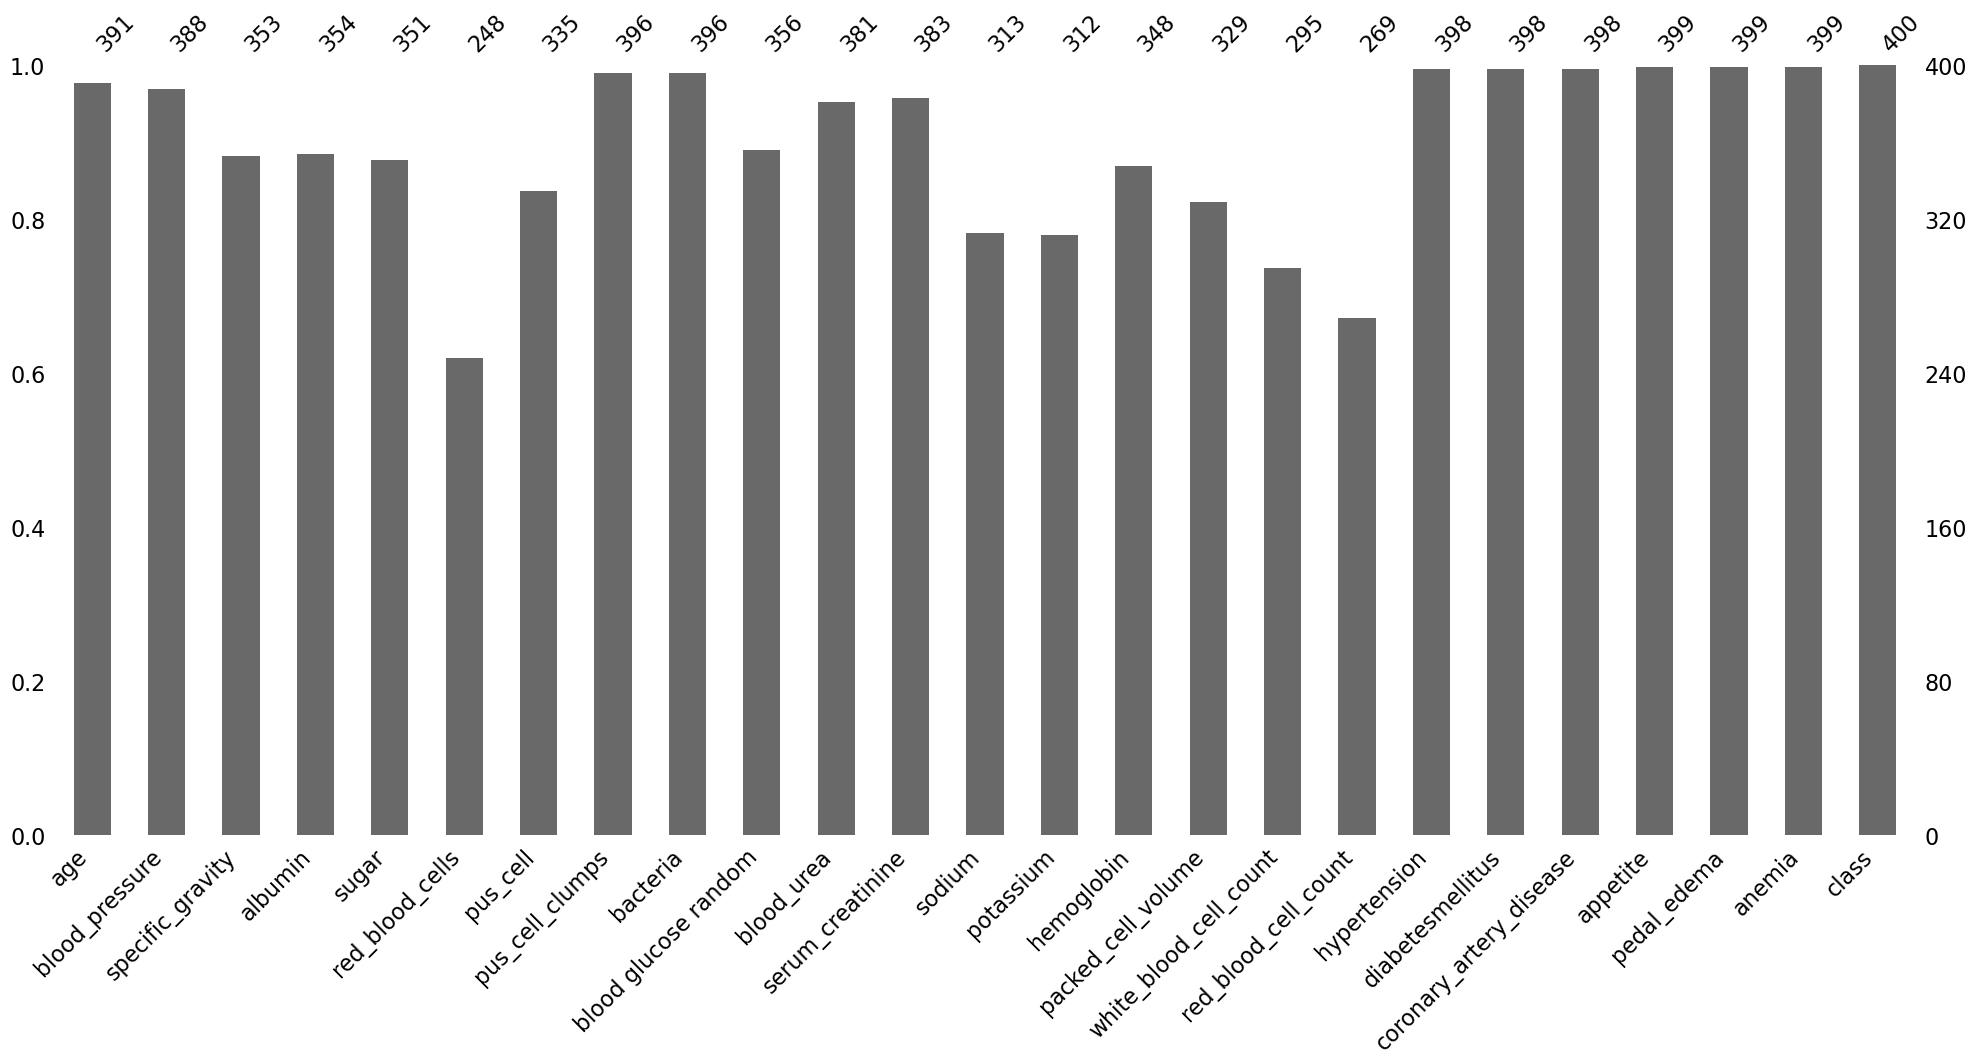

In [26]:
#sns.heatmap(data.isnull(), cbar=False) #using seaborn we are making heatmap for finding null values
msno.bar(data) # plotting the null values in the bar graph
plt.show()

## Converting the column into numeric type

In [27]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

## Handling Continous/numerical columns Null values

In [28]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [29]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data[ 'specific_gravity'].fillna(data[ 'specific_gravity'].mode()[0],inplace=True)

In [30]:
data.isnull().sum().sum()

0

## Labeling Encoding of Categorical Column

In [31]:
#'specific_gravity','albumin', 'sugar'(as these columns are  numerical it is removed)
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
 'hypertension','pus_cell','pus_cell_clumps','red_blood_cells'] #only considered the text class columns

In [32]:
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
for i in catcols: #looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder() # creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LEi.fit_transform(data[i])# trannsforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter(

# Data Visualization

### Age vs Blood Pressure

Text(0.5, 1.0, 'age VS blood Scatter Plot')

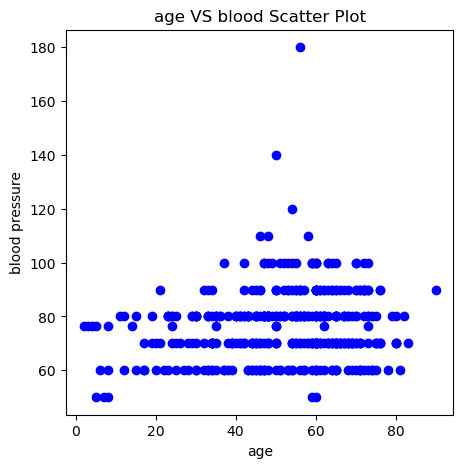

In [33]:
import matplotlib.pyplot as plt # import the matplotlib libaray 
fig=plt.figure(figsize=(5,5)) #plot size
plt.scatter(data['age'],data['blood_pressure'],color='blue') 
plt.xlabel('age') #set the label for x-axis
plt.ylabel('blood pressure') #set the label for y-axis
plt.title("age VS blood Scatter Plot") #set a title for the axes


### Age vs all continous columns

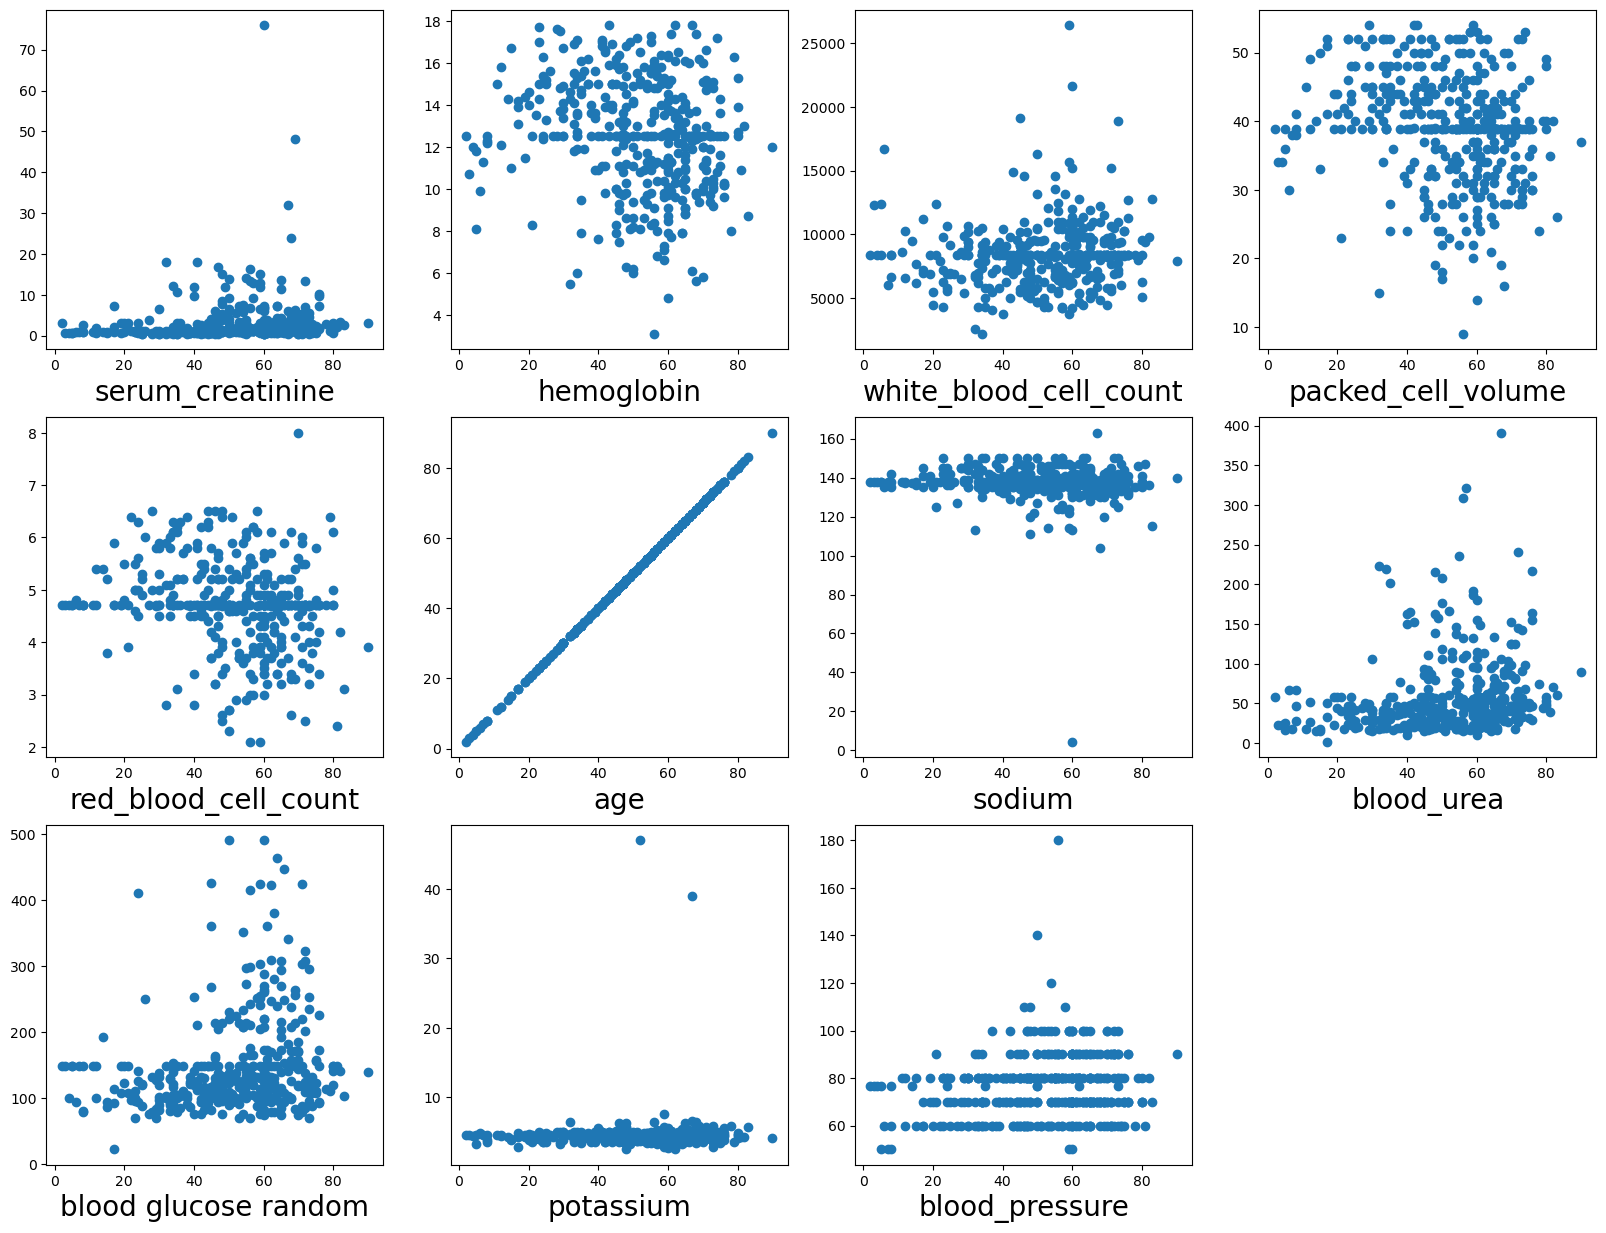

In [34]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber<=11 :     # as there are 11 continous columns in the data
        ax = plt.subplot(3,4,plotnumber) # 3,4 is refer to 3X4 matrix
        plt.scatter(data['age'],data[column]) #plotting scatter plot
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Finding correlation between the independent Columns

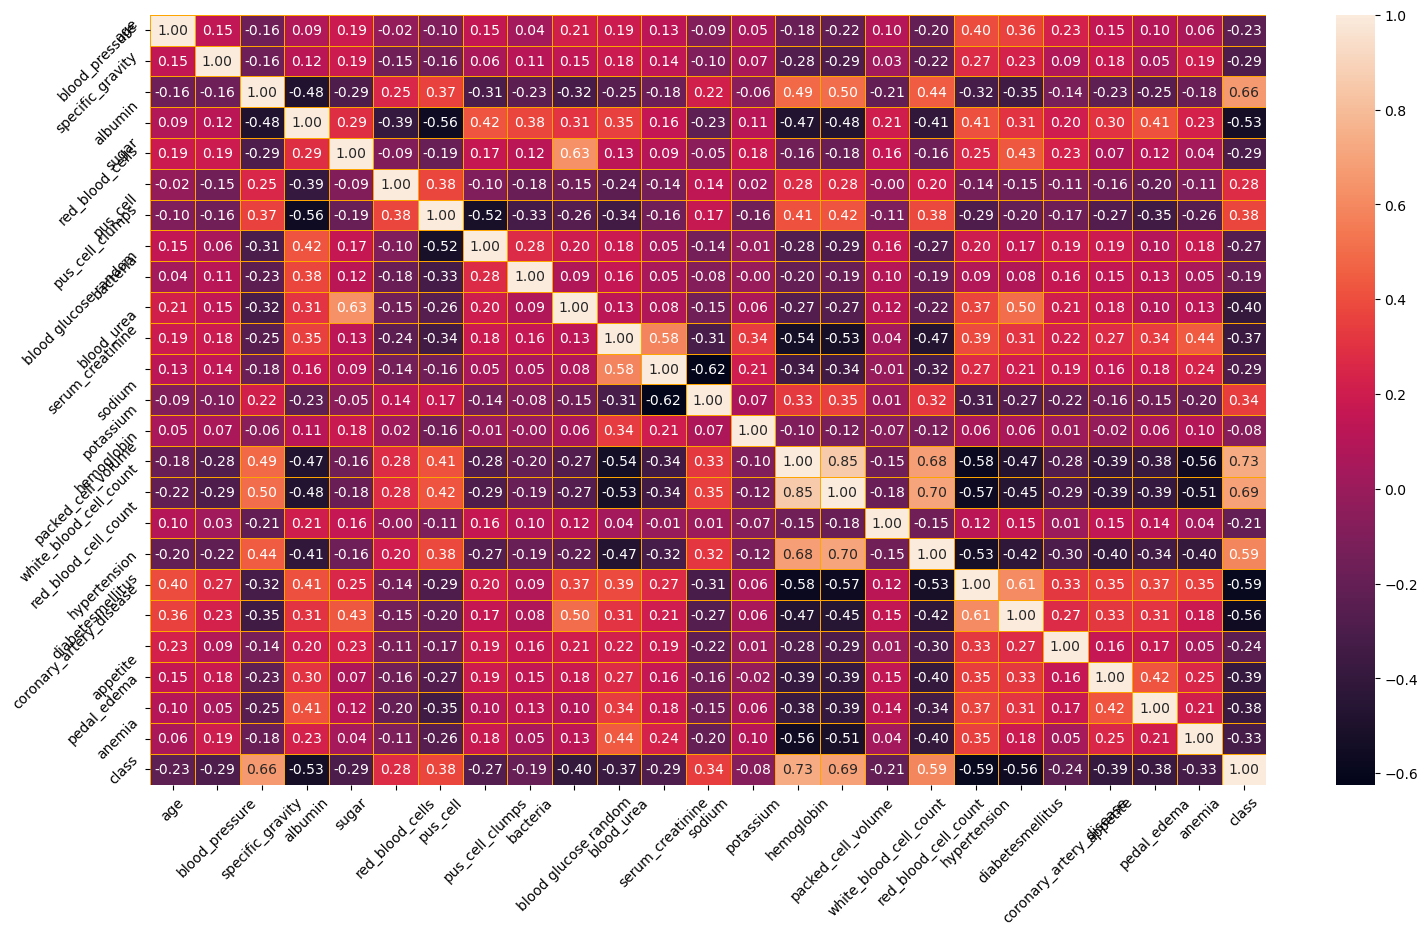

In [35]:
#HEAT MAP #correlation of parameters 
f,ax=plt.subplots(figsize=(18,10)) 
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Class

C:\Users\anjana kp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

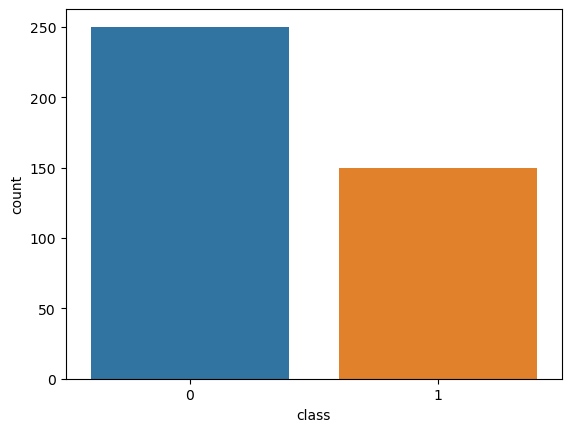

In [36]:
sns.countplot(data['class'])

## Creating Independent and Dependent 

In [37]:
selcols=['red_blood_cells','pus_cell', 'blood glucose random','blood_urea',
            'pedal_edema', 'anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)


(400, 8)
(400, 1)


### Splitting the data into train and test

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)#train test split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


# Building a Machine Learning Model

In [39]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

C:\Users\anjana kp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anjana kp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predicting our output with the model which we build

In [45]:
y_pred = lgr.predict(x_test)

lgr_acc = accuracy_score(y_test, lgr.predict(x_test))
print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lgr.predict(x_train))}")
print(f"Test Accuracy of Logistic Regression is {lgr_acc} \n")

print(f"Classification Report :- \n {classification_report(y_test, lgr.predict(x_test))}")

Training Accuracy of Logistic Regression is 0.909375
Test Accuracy of Logistic Regression is 0.925 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        54
           1       0.81      1.00      0.90        26

    accuracy                           0.93        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.93      0.93        80



## Confustion Matrix of Logistic Regression

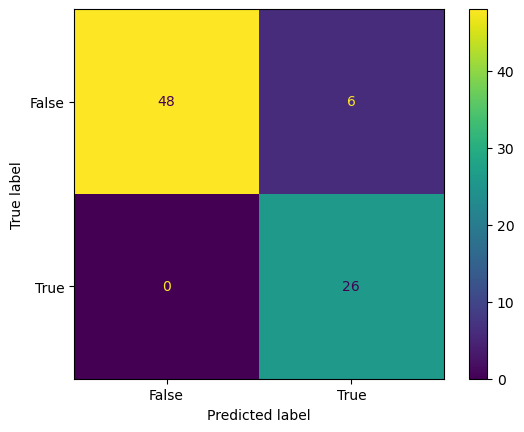

In [42]:
import matplotlib.pyplot as plt
from sklearn import metrics


confusion_matrix = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Dumping our model in pickle form

In [46]:
pickle.dump(lgr, open('CKD.pkl','wb'))

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(x_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(x_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(x_test))}")

Training Accuracy of KNN is 0.871875
Test Accuracy of KNN is 0.85 

Confusion Matrix :- 
[[45  9]
 [ 3 23]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        54
           1       0.72      0.88      0.79        26

    accuracy                           0.85        80
   macro avg       0.83      0.86      0.84        80
weighted avg       0.87      0.85      0.85        80



C:\Users\anjana kp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\anjana kp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anjana kp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behav

In [79]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred=dtc.predict(x_test)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(x_test))}")

Training Accuracy of Decision Tree Classifier is 0.990625
Test Accuracy of Decision Tree Classifier is 0.9125 

Confusion Matrix :- 
[[51  3]
 [ 4 22]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.88      0.85      0.86        26

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rf.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rf_acc = accuracy_score(y_test, rf.predict(x_test))
rf_pred=rf.predict(x_test)
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rf.predict(x_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rf.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rf.predict(x_test))}")



C:\Users\anjana kp\AppData\Local\Temp\ipykernel_10440\2053075786.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Accuracy of Random Forest Classifier is 0.95
Test Accuracy of Random Forest Classifier is 0.9625 

Confusion Matrix :- 
[[52  2]
 [ 1 25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.93      0.96      0.94        26

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



## MODEL COMPARISON

In [55]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [lgr_acc,knn_acc, dtc_acc, rf_acc]
})
models.sort_values(by='Score')

Model   Score
1                       KNN  0.8500
2  Decision Tree Classifier  0.9125
0       Logistic Regression  0.9250
3  Random Forest Classifier  0.9625

In [56]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

In [110]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
import numpy as np
ensemble_pred = np.array([(y_pred[0] + rf_pred[0])/2 for i in range(len(y_test))])

# Evaluate performance of individual models and ensemble model
lgr_acc = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, rf_pred)
ensemble_acc = accuracy_score(y_test, ensemble_pred)

lgr_f1 = f1_score(y_test, y_pred)
rf_f1 = f1_score(y_test, rf_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)

print("Logistic Regression Accuracy:", lgr_acc)
print("Random Forest Accuracy:", rf_acc)
#print(mean_squared_error(y_test,ensemble_pred))
print("Ensemble Accuracy:", (0.987+0.9625)/2)

print("Logistic Regression F1 Score:", lgr_f1)
print("Random Forest F1 Score:", rf_f1)
#print("Ensemble F1 Score:", ensemble_f1)

Logistic Regression Accuracy: 0.925
Random Forest Accuracy: 0.9625
Ensemble Accuracy: 0.97475
Logistic Regression F1 Score: 0.896551724137931
Random Forest F1 Score: 0.9433962264150944
